## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [1]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [2]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [3]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [4]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
11.446
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [12]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 20:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Project Power 0 0
Deathstroke: Knights & Dragons - The Movie 0 0
Fearless 0 0
Work It 0 0
Joker 55000000 1074251311
The Secret Garden 0 0
The Old Guard 70000000 0
Magic Camp 24000000 0
Coma 4000000 2363584
Avengers: Infinity War 300000000 2046239637
Captain America: Civil War 250000000 1153296293
Inception 160000000 825532764
Fate/Stay Night: Heaven's Feel III. Spring Song 0 0
Tesla 5000000 0
Scoob! 0 9430580
The Tax Collector 30000000 0
The King of Staten Island 0 0
Palm Springs 0 164000
The Kissing Booth 2 0 0


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [5]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [6]:
a = tmdb.Movies()
abc = a.popular()

In [7]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Waves
Deathstroke: Knights & Dragons - The Movie


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [8]:
popular_dict[0]

{'popularity': 193.98,
 'vote_count': 369,
 'video': False,
 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg',
 'id': 605116,
 'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'original_language': 'en',
 'original_title': 'Project Power',
 'genre_ids': [28, 80, 878],
 'title': 'Project Power',
 'vote_average': 6.7,
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'release_date': '2020-08-14'}

In [9]:
doop[0]

{'popularity': 18.981,
 'vote_count': 2160,
 'video': False,
 'poster_path': '/3jcNvhtVQe5Neoffdic39fRactM.jpg',
 'id': 381289,
 'adult': False,
 'backdrop_path': '/2ddVTlMyATZdvUHE7DPExA2X6xF.jpg',
 'original_language': 'en',
 'original_title': "A Dog's Purpose",
 'genre_ids': [12, 35, 18, 14, 10751],
 'title': "A Dog's Purpose",
 'vote_average': 7.5,
 'overview': 'A dog goes on quest to discover his purpose in life over the course of several lifetimes with multiple owners.',
 'release_date': '2017-01-19'}

In [10]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[605116, 703771, 726664, 612706, 475557, 521034, 547016, 454433, 430155, 299536, 271110, 27205, 390635, 517412, 385103, 531499, 579583, 587792, 583083, 516486]
['Project Power', 'Deathstroke: Knights & Dragons - The Movie', 'Fearless', 'Work It', 'Joker', 'The Secret Garden', 'The Old Guard', 'Magic Camp', 'Coma', 'Avengers: Infinity War', 'Captain America: Civil War', 'Inception', "Fate/Stay Night: Heaven's Feel III. Spring Song", 'Tesla', 'Scoob!', 'The Tax Collector', 'The King of Staten Island', 'Palm Springs', 'The Kissing Booth 2', 'Greyhound']


In [11]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

521034

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [13]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 193.98, 'vote_count': 369, 'video': False, 'poster_path': '/bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg', 'id': 605116, 'adult': False, 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg', 'original_language': 'en', 'original_title': 'Project Power', 'genre_ids': [28, 80, 878], 'title': 'Project Power', 'vote_average': 6.7, 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.', 'release_date': '2020-08-14'}


In [14]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [15]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path      id  \
995      18.903        3727  False  /AvfTP1muzUQ0gWCEAj4hlkTOCtc.jpg     630   
996      18.902        5492  False  /tw0lXhbNkklvseuJ4aYldkVyXV7.jpg  273481   
997      18.898        3813  False  /tVxGt7uffLVhIIcwuldXOMpFBPX.jpg    1018   
998      18.892        1524  False  /dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg  491418   
999      18.888         372  False  /yx4cp1ljJMDSFeEex0Zjv45b55E.jpg  581859   

     adult                     backdrop_path original_language  \
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg                en   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg                en   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg                en   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg                en   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg                en   

       original_title        genre_ids             title  vote_average  \
995  The Wizard of Oz  [12, 14, 10751]  The Wizard of Oz           7.6   
996           Sicario     [28, 80, 53]           Sicario           7.3   
997  Mulholland Drive   [53, 18, 9648]  Mulholland Drive           7.8   
998    Instant Family         [35, 18]    Instant Family           7.5   
999       Da 5 Bloods      [18, 10752]       Da 5 Bloods           6.7   

                                              overview release_date  
995  Young Dorothy finds herself in a magical world...   1939-08-15  
996  An idealistic FBI agent is enlisted by a gover...   2015-09-17  
997  Blonde Betty Elms has only just arrived in Hol...   2001-09-08  
998  When Pete and Ellie decide to start a family, ...   2018-11-16  
999  Four African-American Vietnam veterans return ...   2020-06-12

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [16]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          991 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        985 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [17]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [18]:
copy_mmdf = main_movie_df

In [19]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       193.980         369  False  /bOKjzWDxiDkgEQznhzP4kdeAHNI.jpg  605116   
1       157.402          84  False  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg  703771   
2       106.734          16  False  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg  726664   
3       104.097         389  False  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg  612706   
4        99.681       14321  False  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg  475557   
..          ...         ...    ...                               ...     ...   
995      18.903        3727  False  /AvfTP1muzUQ0gWCEAj4hlkTOCtc.jpg     630   
996      18.902        5492  False  /tw0lXhbNkklvseuJ4aYldkVyXV7.jpg  273481   
997      18.898        3813  False  /tVxGt7uffLVhIIcwuldXOMpFBPX.jpg    1018   
998      18.892        1524  False  /dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg  491418   
999      18.888         372  False  /yx4cp1ljJMDSFeEex0Zjv45b55E.jpg  581859   

     adult                     backdrop_path original_language  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                en   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                en   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                en   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                en   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                en   
..     ...                               ...               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg                en   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg                en   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg                en   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg                en   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg                en   

                                 original_title        genre_ids  \
0                                 Project Power    [28, 80, 878]   
1    Deathstroke: Knights & Dragons - The Movie         [28, 16]   
2                                      Fearless         [16, 35]   
3                                       Work It      [35, 10402]   
4                                         Joker     [80, 18, 53]   
..                                          ...              ...   
995                            The Wizard of Oz  [12, 14, 10751]   
996                                     Sicario     [28, 80, 53]   
997                            Mulholland Drive   [53, 18, 9648]   
998                              Instant Family         [35, 18]   
999                                 Da 5 Bloods      [18, 10752]   

                                          title  vote_average  \
0                                 Project Power           6.7   
1    Deathstroke: Knights & Dragons - The Movie           6.9   
2                                      Fearless           7.0   
3                                       Work It           8.0   
4                                         Joker           8.2   
..                                          ...           ...   
995                            The Wizard of Oz           7.6   
996                                     Sicario           7.3   
997                            Mulholland Drive           7.8   
998                              Instant Family           7.5   
999                                 Da 5 Bloods           6.7   

                                              overview release_date  
0    An ex-soldier, a teen and a cop collide in New...   2020-08-14  
1    Ten years ago, Slade Wilson-aka the super-assa...   2020-08-04  
2    A teen gamer is forced to level up to full-tim...   2020-08-14  
3    A brilliant but clumsy high school senior vows...   2020-08-07  
4    During the 1980s, a failed stand-up comedian i...   2019-10-02  
..                                                 ...          ...  
995  Young Dorothy finds herself in a magical world...   1939-08-15  
996  An idealistic FBI agent is enlisted by a gover...   2015-09-17  
997  Blonde Betty Elms 

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> How do films that belong to collections fare compared to films not apart of collections?


## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> assumedly is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment. Also, I'll be investigating films with English as their original language and as well, with other languages spoken in the film.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [20]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/qVygtf2vU15L2yKS4Ke44U4oMdD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 80, 'name': 'Crime'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.netflix.com/projectpower',
 'id': 605116,
 'imdb_id': 'tt7550000',
 'original_language': 'en',
 'original_title': 'Project Power',
 'overview': 'An ex-soldier, a teen and a cop collide in New Orleans as they hunt for the source behind a dangerous new pill that grants users temporary superpowers.',
 'popularity': 193.98,
 'poster_path': '/fjCezXiQWfGuNf4t7LruKky7kwV.jpg',
 'production_companies': [{'id': 102118,
   'logo_path': None,
   'name': 'Screen Arcade',
   'origin_country': 'US'},
  {'id': 71895,
   'logo_path': None,
   'name': 'Supermarché',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date': '2020-08-14',
 'revenue': 0,
 'runtime': 113,
 'spo

In [21]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
4  False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                  None  55000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4  [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   

                                 homepage      id     imdb_id  \
0     http://www.netflix.com/projectpower  605116   tt7550000   
1                                          703771  tt12876132   
2  https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.netflix.com/title/81132038  612706  tt10276470   
4              http://www.jokermovie.net/  475557   tt7286456   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                en                                     Work It   
4                en                                       Joker   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     193.980   
1  Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2  A teen gamer is forced to level up to full-tim...     106.734   
3  A brilliant but clumsy high school senior vows...     104.097   
4  During the 1980s, a failed stand-up comedian i...      99.681   

                        poster_path  \
0  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
4  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
4  [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14           0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04           0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14           0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
4  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02  1074251311   

   runtime                                   spoken_languages    status  \
0    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    122.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3                            Dance to your own beat.   
4                               Put on a happy face.   

                                        title  video  vote_average  vote_count  
0                               Project Power  False           6.7

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [22]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3571
---
1480
---
['Roadside Attractions', 'Culmination Productions', 'Mississippix Studios', 'Ascot Elite - Ascot Life!', 'See Me Louisiana', 'Grindstone Entertainment Group', 'Miramax', 'Two Flints', 'Munich Film Partners & Company (MFP) GHS Productions', 'Bron Studios', 'Rogue Marble', 'Upload Films', 'Cedar Park Entertainment', 'Blumhouse Productions', 'Red Granite Pictures', 'Sunstar Entertainment', 'Limited Edition Productions Inc.', 'Icon Entertainment International', 'Mandeville Films', 'Eldorado Films', 'Liveplanet', 'Bold Films', 'Irish Dreamtime', 'Elara Pictures', 'Icon Productions', 'Dadi Film Group', 'Sean Bailey Productions', 'Inside Track 2', 'Kinberg Genre', 'Slap Happy Productions (II)', 'Juno Pix', 'British Film Institute', 'Universidad Autónoma de Aguascalientes', 'Point Grey Pictures', 'Tiny Cinema', 'Theobald Film Productions', 'Ashton Productions', 'Cofinova 11', 'Origin Pictures', 'Marubeni', 'Imhotep Productions', 'Tohokushinsha Film Corporation (TFC)', 'Norsk 

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [23]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
4  False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                  None  55000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4  [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   

                                 homepage      id     imdb_id  \
0     http://www.netflix.com/projectpower  605116   tt7550000   
1                                          703771  tt12876132   
2  https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.netflix.com/title/81132038  612706  tt10276470   
4              http://www.jokermovie.net/  475557   tt7286456   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                en                                     Work It   
4                en                                       Joker   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     193.980   
1  Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2  A teen gamer is forced to level up to full-tim...     106.734   
3  A brilliant but clumsy high school senior vows...     104.097   
4  During the 1980s, a failed stand-up comedian i...      99.681   

                        poster_path  \
0  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
4  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
4  [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14           0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04           0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14           0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
4  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02  1074251311   

   runtime                                   spoken_languages    status  \
0    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    122.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3                            Dance to your own beat.   
4                               Put on a happy face.   

                                        title  video  vote_average  \
0                               Project Power  False           6.7   
1  Deat

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [24]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [25]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

Screen Arcade  Supermarché  Roadside Attractions  \
0                1            1                     0   
1                0            0                     0   
2                0            0                     0   
3                0            0                     0   
4                0            0                     0   
..             ...          ...                   ...   
995              0            0                     0   
996              0            0                     0   
997              0            0                     0   
998              0            0                     0   
999              0            0                     0   

     Culmination Productions  Mississippix Studios  Ascot Elite - Ascot Life!  \
0                          0                     0                          0   
1                          0                     0                          0   
2                          0                     0                          0   
3                          0                     0                          0   
4                          0                     0                          0   
..                       ...                   ...                        ...   
995                        0                     0                          0   
996                        0                     0                          0   
997                        0                     0                          0   
998                        0                     0                          0   
999                        0                     0                          0   

     See Me Louisiana  Grindstone Entertainment Group  Miramax  Two Flints  \
0                   0                               0        0           0   
1                   0                               0        0           0   
2                   0                               0        0           0   
3                   0                               0        0           0   
4                   0                               0        0           0   
..                ...                             ...      ...         ...   
995                 0                               0        0           0   
996                 0                               0        0           0   
997                 0                               0        0           0   
998                 0                               0        0           0   
999                 0                               0        0           0   

     Munich Film Partners & Company (MFP) GHS Productions  Bron Studios  \
0                                                    0                0   
1                                                    0                0   
2                                                    0                0   
3                                                    0                0   
4                                                    0                1   
..                                                 ...              ...   
995                                                  0                0   
996                                                  0                0   
997                                                  0                0   
998                                                  0                0   
999                                                  0                0   

     Rogue Marble  Upload Films  Cedar Park Entertainment  \
0               0             0                         0   
1               0             0                         0   
2               0             0                         0   
3               0             0                         0   
4               0             0                         0   
..            ...           ...                       ...   
995             0             0                         0   
996             0    

In [261]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  55000000   
..                                                 ...       ...   
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id     imdb_id  \
0         http://www.netflix.com/projectpower  605116   tt7550000   
1                                              703771  tt12876132   
2      https://www.netflix.com/title/81252403  726664   tt8675288   
3      https://www.netflix.com/title/81132038  612706  tt10276470   
4                  http://www.jokermovie.net/  475557   tt7286456   
..                                        ...     ...         ...   
995      http://thewizardofoz.warnerbros.com/     630   tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481   tt3397884   
997                                              1018   tt0166924   
998        https://www.instantfamilymovie.com  491418   tt7401588   
999    https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  en                                     Work It   
4                  en                                       Joker   
..                ...                                         ...   
995                en                            The Wizard of Oz   
996                en                                     Sicario   
997                en                            Mulholland Drive   
998                en                              Instant Family   
999                en                                 Da 5 Bloods   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     193.980   
1    Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2    A teen gamer is forced to level up to ful

## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [278]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['net_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['net_income'] = newshaq['net_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  55000000   
..                                                 ...       ...   
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id     imdb_id  \
0         http://www.netflix.com/projectpower  605116   tt7550000   
1                                              703771  tt12876132   
2      https://www.netflix.com/title/81252403  726664   tt8675288   
3      https://www.netflix.com/title/81132038  612706  tt10276470   
4                  http://www.jokermovie.net/  475557   tt7286456   
..                                        ...     ...         ...   
995      http://thewizardofoz.warnerbros.com/     630   tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481   tt3397884   
997                                              1018   tt0166924   
998        https://www.instantfamilymovie.com  491418   tt7401588   
999    https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  en                                     Work It   
4                  en                                       Joker   
..                ...                                         ...   
995                en                            The Wizard of Oz   
996                en                                     Sicario   
997                en                            Mulholland Drive   
998                en                              Instant Family   
999                en                                 Da 5 Bloods   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     193.980   
1    Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2    A teen gamer is forced to level up to ful

In [481]:
newshaq = newshaq.rename(columns={"net_income": "gross_income"})

## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [482]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  55000000   
..                                                 ...       ...   
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id     imdb_id  \
0         http://www.netflix.com/projectpower  605116   tt7550000   
1                                              703771  tt12876132   
2      https://www.netflix.com/title/81252403  726664   tt8675288   
3      https://www.netflix.com/title/81132038  612706  tt10276470   
4                  http://www.jokermovie.net/  475557   tt7286456   
..                                        ...     ...         ...   
995      http://thewizardofoz.warnerbros.com/     630   tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481   tt3397884   
997                                              1018   tt0166924   
998        https://www.instantfamilymovie.com  491418   tt7401588   
999    https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  en                                     Work It   
4                  en                                       Joker   
..                ...                                         ...   
995                en                            The Wizard of Oz   
996                en                                     Sicario   
997                en                            Mulholland Drive   
998                en                              Instant Family   
999                en                                 Da 5 Bloods   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     193.980   
1    Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2    A teen gamer is forced to level up to ful

In [483]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id    imdb_id  \
995      http://thewizardofoz.warnerbros.com/     630  tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481  tt3397884   
997                                              1018  tt0166924   
998        https://www.instantfamilymovie.com  491418  tt7401588   
999    https://www.netflix.com/title/81045635  581859  tt9777644   

    original_language    original_title  \
995                en  The Wizard of Oz   
996                en           Sicario   
997                en  Mulholland Drive   
998                en    Instant Family   
999                en       Da 5 Bloods   

                                              overview  popularity  \
995  Young Dorothy finds herself in a magical world...      18.903   
996  An idealistic FBI agent is enlisted by a gover...      18.902   
997  Blonde Betty Elms has only just arrived in Hol...      18.898   
998  When Pete and Ellie decide to start a family, ...      18.892   
999  Four African-American Vietnam veterans return ...      18.888   

                          poster_path  \
995  /AvfTP1muzUQ0gWCEAj4hlkTOCtc.jpg   
996  /tw0lXhbNkklvseuJ4aYldkVyXV7.jpg   
997  /tVxGt7uffLVhIIcwuldXOMpFBPX.jpg   
998  /dic3GdmMpxxfkCQfvZnasb5ZkSG.jpg   
999  /yx4cp1ljJMDSFeEex0Zjv45b55E.jpg   

                                  production_companies  \
995  [{'id': 21, 'logo_path': '/mjofSXiHpG5t6KYmU4l...   
996  [{'id': 3528, 'logo_path': '/cCzCClIzIh81Fa79h...   
997  [{'id': 373, 'logo_path': None, 'name': 'Asymm...   
998  [{'id': 8537, 'logo_path': None, 'name': 'Clos...   
999  [{'id': 4319, 'logo_path': None, 'name': '40 A...   

                                  production_countries release_date   revenue  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   1939-08-15  33754967   
996  [{'iso_3166_1': 'US', 'name': 'United States o...   2015-09-17  84025816   
997  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...   2001-09-08  20117339   
998  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-11-16  14700000   
999  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-06-12         0   

     runtime                                   spoken_languages    status  \
995    102.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
996    122.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
997    147.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
998    118.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
999    156.0  [{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...  Released   

                                               tagline             title  \
995  We're off to see the Wizard, the wonderful Wiz...  The Wizard of Oz   
996          The border is just another line to cross.           Sicario   
997  An actress longing to be a star. A woman searc...  Mulholland Drive   
998  Just add chaos

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [484]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '08-01-2017'
end_date = '07-31-2020'

In [485]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
5    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
6    False  /m0ObOaJBerZ3Unc74l471ar8Iiy.jpg   
8    False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
9    False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
..     ...                               ...   
984  False  /tcrNJfyNEIqaBR8Ogkgnq5xQJnf.jpg   
989  False  /53aUwtolUZxgzMr2KbDpOnD8jo3.jpg   
993  False  /8LI4OEQGY2DIBTQQeRjYVKfL9Dl.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection     budget  \
4                                                 None   55000000   
5                                                 None          0   
6                                                 None   70000000   
8                                                 None    4000000   
9    {'id': 86311, 'name': 'The Avengers Collection...  300000000   
..                                                 ...        ...   
984                                               None          0   
989                                               None          0   
993                                               None          0   
998                                               None   48000000   
999                                               None   45000000   

                                                genres  \
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
5    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
6    [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   
8    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
9    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
..                                                 ...   
984  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
989  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
993  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                              homepage      id     imdb_id  \
4                           http://www.jokermovie.net/  475557   tt7286456   
5                                                       521034   tt2702920   
6               https://www.netflix.com/title/81038963  547016   tt7556122   
8                                                       430155   tt6087226   
9    https://www.marvel.com/movies/avengers-infinit...  299536   tt4154756   
..                                                 ...     ...         ...   
984             https://www.netflix.com/title/80208802  342470   tt3907584   
989             https://www.netflix.com/title/80991326  718867  tt12588448   
993                                                     608195   tt6508228   
998                 https://www.instantfamilymovie.com  491418   tt7401588   
999             https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language          original_title  \
4                  en                   Joker   
5                  en       The Secret Garden   
6                  en           The Old Guard   
8                  ru                    Кома   
9                  en  Avengers: Infinity War   
..                ...                     ...   
984                en   All the Bright Places   
989                en  The Larva Island Movie   
993                en           Ghosts of War   
998                en          Instant Family   
999                en             Da 5 Bloods   

                                              overview  popularity  \
4    During the 1980s, a failed stand-up comedian i...      99.681   
5    Mary Lennox is born in India to wealthy Britis...      97.861   
6    Four undying warriors who've secretly protecte...      93.822   
8    A young and talented architect comes to his se...      83.709   
9    As the Avengers and t

In [487]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['gross_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
64  False  /orjiB3oUIsyz60hoEqkiGpy5CeO.jpg   
9   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
46  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
30  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
57  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
64  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
9   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
46                                               None  260000000   
30  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
57                                               None  200000000   

                                               genres  \
64  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
9   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
46  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
30  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
57  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
64     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
9   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
46       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
30                 https://movies.disney.com/frozen-2  330457  tt4520988   
57  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
64                en       Avengers: Endgame   
9                 en  Avengers: Infinity War   
46                en           The Lion King   
30                en               Frozen II   
57                en           Black Panther   

                                             overview  popularity  \
64  After the devastating events of Avengers: Infi...      40.636   
9   As the Avengers and their allies have continue...      82.930   
46  Simba idolizes his father, King Mufasa, and ta...      45.669   
30  Elsa, Anna, Kristoff and Olaf head far into th...      51.526   
57  King T'Challa returns home from America to the...      42.756   

                         poster_path  \
64  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
9   /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
46  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
30  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
57  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
64  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
9   [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
46  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
30  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
57  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
64  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
9   [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
46  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
30  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
57  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
64  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
9   2046239637    149.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
46  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
30  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
57  1346739107    134.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
64  Released        Part of the journey is the end.       Avengers: Endgame   
9   Released  An entire universe. Once and for all.  Avengers: Infinity War   
46  Released                 The King has Returned.           The Lion King   
30  Released      

In [488]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['Screen Arcade',
 'Supermarché',
 'Roadside Attractions',
 'Culmination Productions',
 'Mississippix Studios',
 'Ascot Elite - Ascot Life!',
 'See Me Louisiana',
 'Grindstone Entertainment Group',
 'Miramax',
 'Two Flints',
 'Munich Film Partners & Company (MFP) GHS Productions',
 'Bron Studios',
 'Rogue Marble',
 'Upload Films',
 'Cedar Park Entertainment',
 'Blumhouse Productions',
 'Red Granite Pictures',
 'Sunstar Entertainment',
 'Limited Edition Productions Inc.',
 'Icon Entertainment International',
 'Mandeville Films',
 'Eldorado Films',
 'Liveplanet',
 'Bold Films',
 'Irish Dreamtime',
 'Elara Pictures',
 'Icon Productions',
 'Dadi Film Group',
 'Sean Bailey Productions',
 'Inside Track 2',
 'Kinberg Genre',
 'Slap Happy Productions (II)',
 'Juno Pix',
 'British Film Institute',
 'Universidad Autónoma de Aguascalientes',
 'Point Grey Pictures',
 'Tiny Cinema',
 'Theobald Film Productions',
 'Ashton Productions',
 'Cofinova 11',
 'Origin Pictures',
 'Marubeni',
 'Imhotep Produ

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [489]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_net_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_net_dict[c] = grander_df['gross_income'].sum()

In [490]:
#Now, to create the DataFrame.
company_total_net = pd.DataFrame(list(company_net_dict.items()),columns=
             ['production_companies','total_gross_income']).sort_values(by='total_gross_income',ascending=False)
ctn = company_total_net.iloc[:20,:].set_index('production_companies')
ctn

total_gross_income
production_companies                       
Walt Disney Pictures             9400927281
Marvel Studios                   8439633363
Warner Bros. Pictures            5705083104
Universal Pictures               4417409680
20th Century Fox                 3079046191
DC Comics                        2776029145
DC Entertainment                 2776029145
DC Films                         2776029145
Columbia Pictures                2625642888
Pixar                            2469907386
Legendary Entertainment          2260522347
Pascal Pictures                  2148023367
The Safran Company               2108313672
Lucasfilm Ltd.                   2099636510
New Line Cinema                  2013725795
Perfect World Pictures           2008116621
TSG Entertainment                1903536331
Sony Pictures                    1867998792
Marvel Entertainment             1708545172
Amblin Entertainment             1693519414

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [491]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

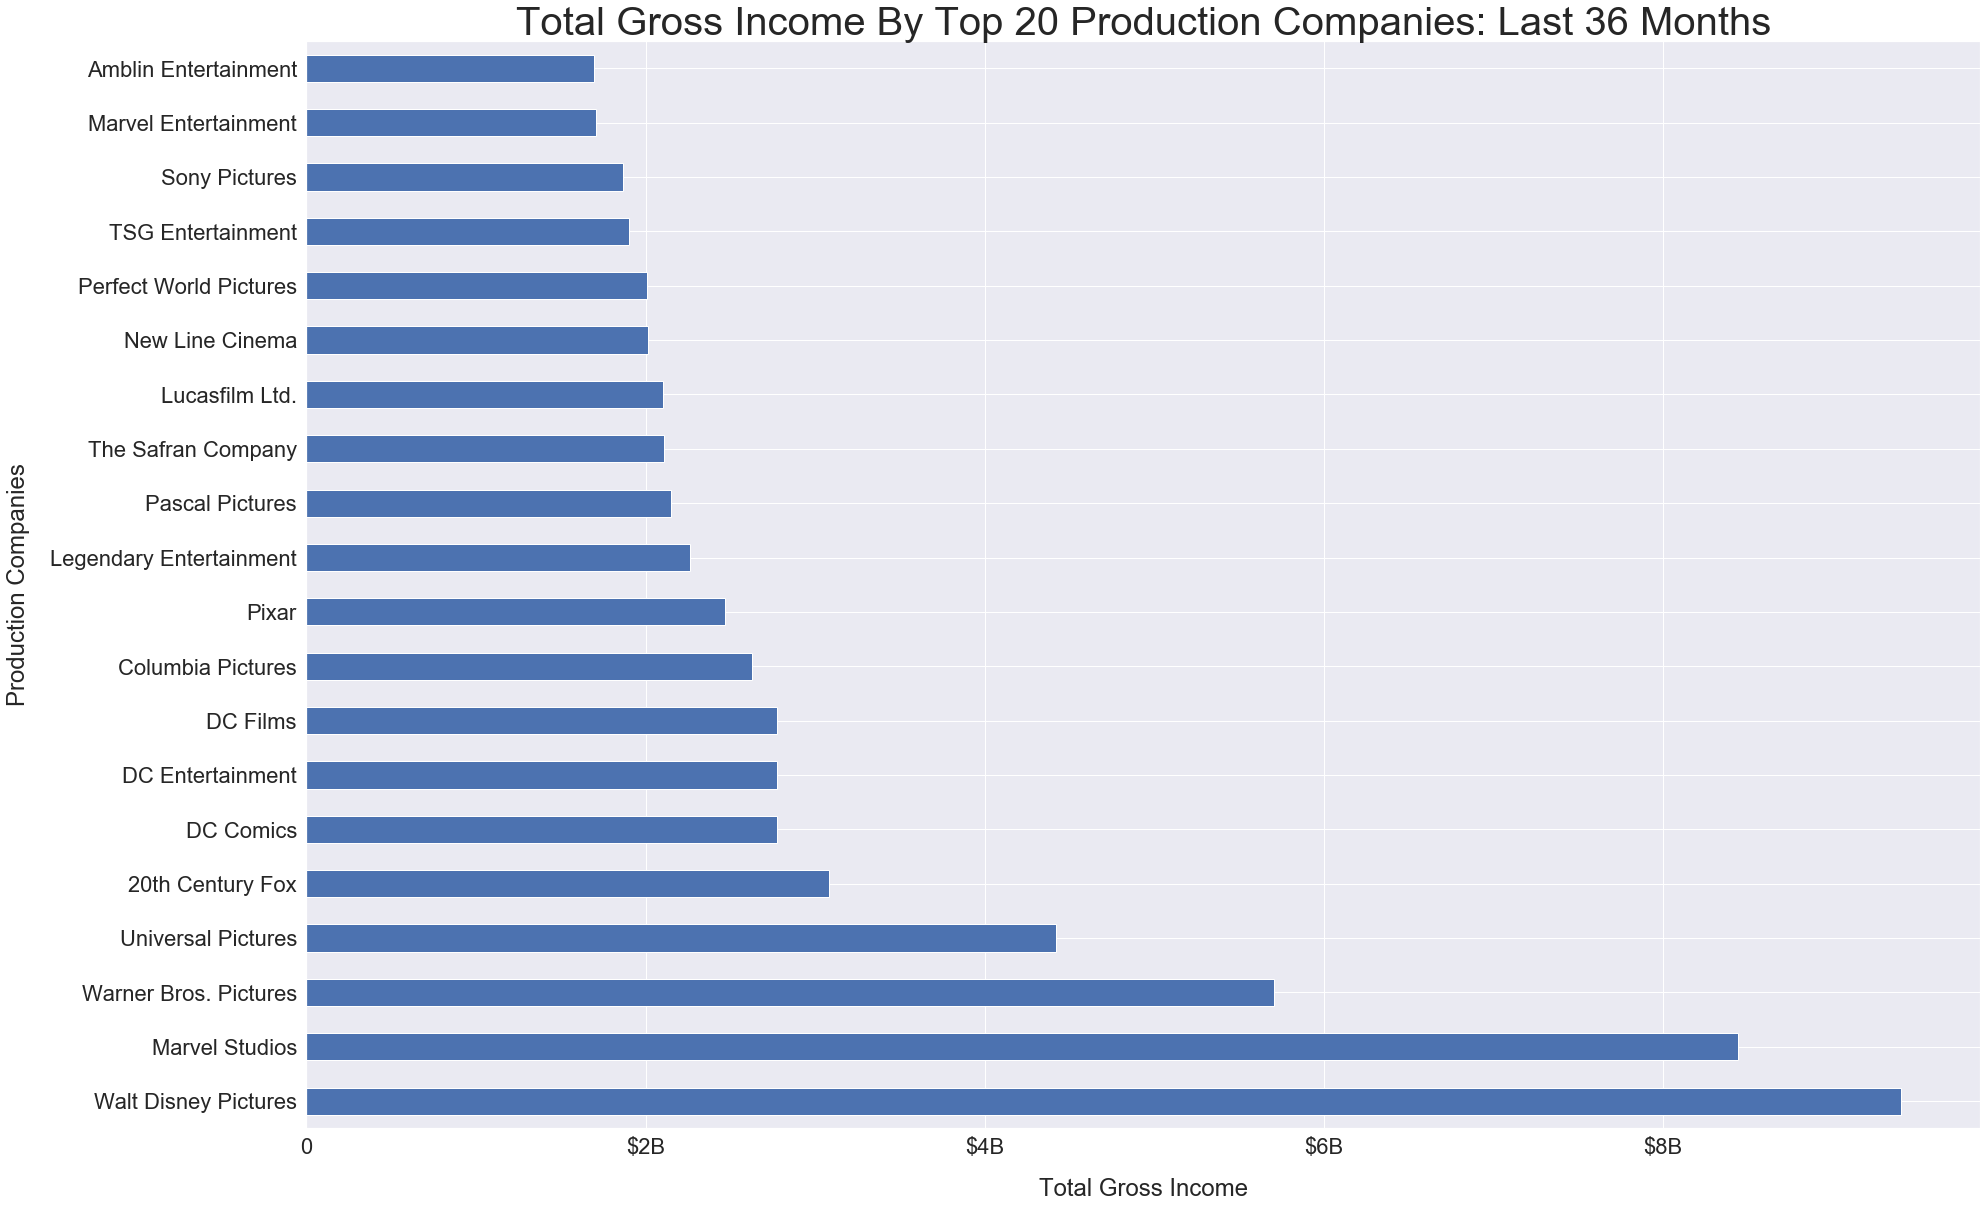

In [493]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=2.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Gross Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Gross Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [494]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [495]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Family': 1, 'Music': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Animation': 1, 'Family': 1},
 {'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Fantasy': 1, 'Romance': 1, 'Family': 1},
 {'Drama': 1, 'Music': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1},
 {'Action': 1, 'Adventure': 1, 'Comedy': 1, 'Fantasy': 1},
 {'Action': 1, 'Comedy': 1, 'Adventure': 1},
 {'Animat

In [496]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Drama              100.0
Action              91.0
Thriller            70.0
Comedy              69.0
Adventure           65.0
Science Fiction     53.0
Horror              45.0
Fantasy             44.0
Family              29.0
Romance             28.0
Crime               25.0
Animation           25.0
Mystery             18.0
History             14.0
War                  9.0
Music                7.0
Documentary          2.0
dtype: float64

### Action, Drama + Thrillers FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

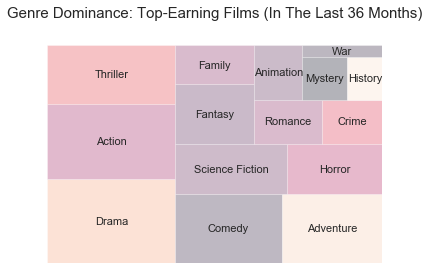

In [498]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':11})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action, Drama + Thriller Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [507]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  gross_income
366                       The Irishman      25.029    -151000000
454                      6 Underground      23.516    -150000000
182                       Artemis Fowl      30.592    -125000000
58                              Onward      42.737     -96818581
6                        The Old Guard      93.822     -70000000
..                                 ...         ...           ...
517               Disturbing the Peace      22.533             0
356  To All the Boys I've Loved Before      25.246             0
501                      The Lovebirds      22.703             0
340                Dolemite Is My Name      25.605             0
373                    The Current War      24.925             0

[100 rows x 3 columns]

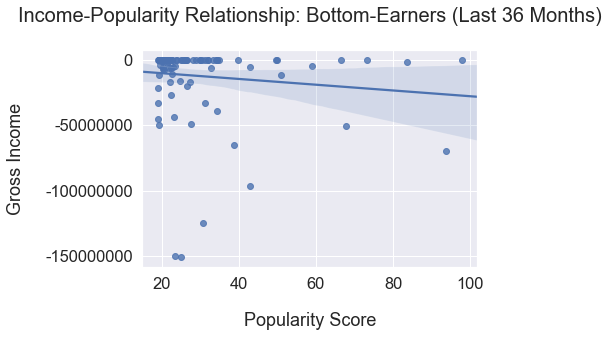

In [508]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [502]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','gross_income']].sort_values(by=['gross_income'],ascending=False)
simpl_top.head(20)

title  popularity  gross_income
64                  Avengers: Endgame      40.636    2441800564
9              Avengers: Infinity War      82.930    1746239637
46                      The Lion King      45.669    1396943394
30                          Frozen II      51.526    1300026933
57                      Black Panther      42.756    1146739107
306    Jurassic World: Fallen Kingdom      26.429    1133459585
138          Star Wars: The Last Jedi      33.101    1132539889
255                     Incredibles 2      27.632    1042805359
4                               Joker      99.681    1019251311
270                           Aquaman      27.303     988461807
78                     Captain Marvel      38.542     976274794
24          Spider-Man: Far from Home      63.886     971927996
213                       Toy Story 4      29.234     898394593
126                           Aladdin      33.920     864612394
308                 Bohemian Rhapsody      26.353     842027543
34   Star Wars: The Rise of Skywalker      49.690     824144248
195                             Venom      30.140     739013954
71                     Thor: Ragnarok      40.038     673977126
192                        Deadpool 2      30.308     631547413
240                              Coco      28.217     625526015

[Text(0, 0.5, '')]

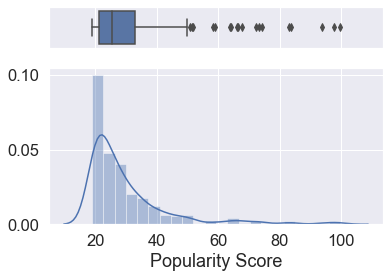

In [504]:
f, (xax_box, xax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .95)})
 
# Add a graph in each part
sns.boxplot(simpl_top["popularity"], ax=xax_box)
sns.distplot(simpl_top["popularity"], ax=xax_hist)
 
# Remove x axis name for the boxplot
xax_box.set(xlabel='')
xax_hist.set(xlabel='Popularity Score')
xax_hist.set(ylabel='')

## High Popularity Scores Are Rare, And That's Good For Business

Here we see that very few films have a popularity score of 50 or higher. But, of course this doesn't mean the film wasn't popular. However, what's more important perhaps is that the data shows something else!

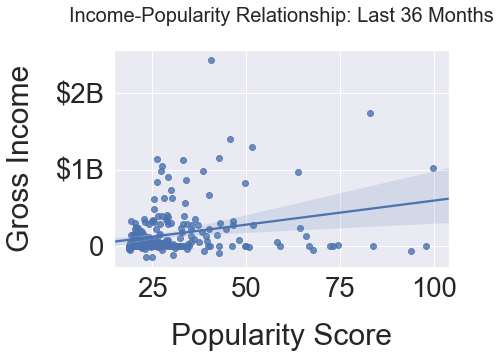

In [506]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=2.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Last 36 Months', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Takeaway #2: More Money More (Popularity) Problems? It Depends.

Interestingly enough, it looks like there's a slightly positive correlation between income and popularity scores. However, one can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which originally non-English language films have had the most success, and ultimately, what's the most "income-positive" country according to the data?

It seems that a good popularity score is difficult to come by. But, what about for non-English language films? For this question, I'd like to investigate how popular non-English language films have done. The goal is to be able to compare with the main insights I've gathered so far.

The first thing I'll do is obtain the proper dataframe.

In [513]:
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  55000000   
..                                                 ...       ...   
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id     imdb_id  \
0         http://www.netflix.com/projectpower  605116   tt7550000   
1                                              703771  tt12876132   
2      https://www.netflix.com/title/81252403  726664   tt8675288   
3      https://www.netflix.com/title/81132038  612706  tt10276470   
4                  http://www.jokermovie.net/  475557   tt7286456   
..                                        ...     ...         ...   
995      http://thewizardofoz.warnerbros.com/     630   tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481   tt3397884   
997                                              1018   tt0166924   
998        https://www.instantfamilymovie.com  491418   tt7401588   
999    https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  en                                     Work It   
4                  en                                       Joker   
..                ...                                         ...   
995                en                            The Wizard of Oz   
996                en                                     Sicario   
997                en                            Mulholland Drive   
998                en                              Instant Family   
999                en                                 Da 5 Bloods   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     193.980   
1    Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2    A teen gamer is forced to level up to ful

In [514]:
#Organize (or, group) the movie list according to the original language

non_eng = pd.DataFrame(newshaq)
non_eng_checker = ~non_eng.original_language.str.contains('en')
non_eng_df = non_eng[non_eng_checker]
non_eng_df.sort_values('gross_income',ascending=False)

adult                     backdrop_path  \
682  False  /bGksau9GGu0uJ8DJQ8DYc9JW5LM.jpg   
203  False  /mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg   
206  False  /Ab8mkHmkYADjU7wQiOkia9BzGvS.jpg   
23   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
506  False  /iuFbU5jiNh8DAxLBGifZCvv3KmB.jpg   
..     ...                               ...   
632  False  /pLHeRaGgy2e9qeTviZZfbWYqZ3s.jpg   
911  False  /sa7HV7c0VVFB6VuGFft8NflU8EG.jpg   
269  False  /aWsVwgG324dFQS5xHEjB7OCOT9w.jpg   
477  False  /neJywSBozU8mhBu04K4jO9Hxf0J.jpg   
257  False  /mPPj0OXBP7uokY1hjkgdb13jhTY.jpg   

                                 belongs_to_collection    budget  \
682                                               None  13000000   
203                                               None         0   
206                                               None  19000000   
23                                                None  11363000   
506                                               None  24000000   
..                                                 ...       ...   
632                                               None  12000000   
911                                               None  15050245   
269  {'id': 619537, 'name': 'Train to Busan Collect...  17000000   
477                                               None  44005000   
257  {'id': 428046, 'name': 'Viy Collection', 'post...  49000000   

                                                genres  \
682  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...   
203  [{'id': 10749, 'name': 'Romance'}, {'id': 16, ...   
206  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
23   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
506  [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...   
..                                                 ...   
632  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
911  [{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...   
269  [{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...   
477  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
257  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   

                                              homepage      id     imdb_id  \
682                                                      77338   tt1675434   
203    https://www.funimationfilms.com/movie/yourname/  372058   tt5311514   
206             http://movies.disney.com/spirited-away     129   tt0245429   
23                     https://www.parasite-movie.com/  496243   tt6751668   
506                                                       4935   tt0347149   
..                                                 ...     ...         ...   
632                                                     581526  tt12763920   
911                                                       4552   tt0365376   
269  https://www.wellgousa.com/films/train-to-busan...  581392   tt8850222   
477                                                     463319   tt6864046   
257  https://www.defiant-ent.com/product/the-iron-m...  428045   tt6218010   

    original_language        original_title  \
682                fr          Intouchables   
203                ja                 君の名は。   
206                ja              千と千尋の神隠し   
23                 ko                   기생충   
506                ja               ハウルの動く城   
..                ...                   ...   
632                ko           다만 악에서 구하소서   
911                ko                장화, 홍련   
269                ko                    반도   
477                zh                     影   
257                ru  Тайна Печати дракона   

                                              overview  popularity  \
682  A true story of two men who should never have ...      20.949   
203  High schoolers Mitsuha and Taki are complete s...      29.646   
206  A young girl, Chihiro, becomes trapped in a st...      29.458   
23   All unemployed, Ki-taek's family takes peculia...      64.193   
506  When Sophie, a shy young woman, is cursed with...      22

In [515]:
ne_df = non_eng_df.loc[:,['title','popularity','original_language','release_date','gross_income']].sort_values(by=['gross_income'],ascending=False)
ne_df

title  popularity original_language  \
682                            The Intouchables      20.949                fr   
203                                  Your Name.      29.646                ja   
206                               Spirited Away      29.458                ja   
23                                     Parasite      64.193                ko   
506                        Howl's Moving Castle      22.675                ja   
..                                          ...         ...               ...   
632                        Deliver Us from Evil      21.295                ko   
911                       A Tale of Two Sisters      19.380                ko   
269                                   Peninsula      27.340                ko   
477                                      Shadow      23.076                zh   
257  Journey to China: The Mystery of Iron Mask      27.615                ru   

    release_date  gross_income  
682   2011-11-02     413480871  
203   2016-08-26     357986087  
206   2001-07-20     255925095  
23    2019-05-30     234561070  
506   2004-11-19     212049757  
..           ...           ...  
632   2020-08-05     -12000000  
911   2003-06-13     -15050245  
269   2020-07-15     -17000000  
477   2018-09-30     -44005000  
257   2019-08-16     -49000000  

[73 rows x 5 columns]

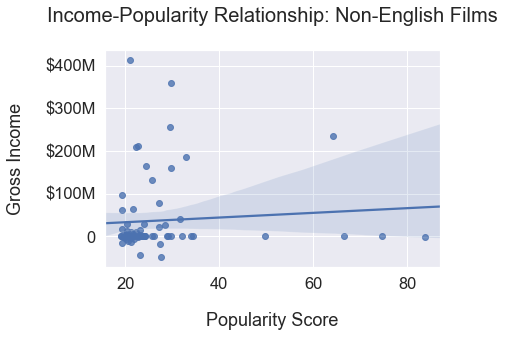

In [516]:
pop_net_non_eng = ne_df
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_non_eng["popularity"], y=pop_net_non_eng["gross_income"], ax=ax, marker='o')

plt.xlabel('Popularity Score',labelpad=20)
plt.ylabel('Gross Income',labelpad=20)
plt.title('Income-Popularity Relationship: Non-English Films', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

In [517]:
lang_money = newshaq.groupby(['original_language'])['gross_income'].sum().sort_values(ascending=False)
lang_money

original_language
en    192619367558
ja      1383629886
fr       584331552
ko       310410554
it       216554954
sv       158975754
es       103128470
de         4983582
pl               0
id               0
hi               0
pt           -1000
da        -5256817
ru       -12923983
zh       -44005000
Name: gross_income, dtype: int64

In [52]:
def cool_func_langs(row):

    num_of_langs = [l['name'] for l in row['spoken_languages']]
    letsgo = {}
    num_of_lang_list = []
    
    for i in num_of_langs:
        if i != '':
            letsgo[i] = 1
            
    return letsgo

In [53]:
lang_sum = newshaq.apply(lambda r: cool_func_langs(r), axis=1).to_list()
lang_sum

[{'English': 1},
 {'Français': 1, 'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1, 'Italiano': 1, 'Pусский': 1, 'العربية': 1, 'Français': 1},
 {'English': 1},
 {'Pусский': 1},
 {'English': 1},
 {'Română': 1, 'English': 1, 'Deutsch': 1, 'Pусский': 1},
 {'English': 1, '日本語': 1, 'Français': 1},
 {'日本語': 1},
 {'English': 1},
 {'English': 1},
 {'Español': 1, 'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'Pусский': 1},
 {'English': 1, '普通话': 1},
 {'English': 1},
 {'English': 1, 'Deutsch': 1, '한국어/조선말': 1},
 {'Český': 1, 'Nederlands': 1, 'English': 1, 'Deutsch': 1, 'Italiano': 1},
 {'English': 1, 'Italiano': 1},
 {'English': 1},
 {'English': 1, 'Norsk': 1},
 {'English': 1},
 {'English': 1, 'Français': 1, 'Deutsch': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'Français': 1},
 {'English': 1},
 {'English': 1, 'Français': 1, 'Italiano': 1},
 {'English': 1},
 {'English': 1},
 {'English': 1},
 {'En

In [54]:
lang_sum_list = []
for l in lang_sum:
    lang_sum_list.append(len(l))

lang_sum_list

[1,
 2,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 5,
 2,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 8,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 5,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 6,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 2,


In [57]:
lang_sum_df_col = pd.DataFrame(lang_sum_list,columns=['number_of_languages'])
lang_sum_df_col

number_of_languages
0                      1
1                      2
2                      1
3                      1
4                      1
..                   ...
995                    1
996                    2
997                    2
998                    1
999                    4

[1000 rows x 1 columns]

In [510]:
major_df = pd.concat([newshaq, lang_sum_df_col], axis=1)
major_df.head()

adult                     backdrop_path belongs_to_collection    budget  \
0  False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg                  None         0   
1  False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg                  None         0   
2  False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg                  None         0   
3  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                  None         0   
4  False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                  None  55000000   

                                              genres  \
0  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4  [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   

                                 homepage      id     imdb_id  \
0     http://www.netflix.com/projectpower  605116   tt7550000   
1                                          703771  tt12876132   
2  https://www.netflix.com/title/81252403  726664   tt8675288   
3  https://www.netflix.com/title/81132038  612706  tt10276470   
4              http://www.jokermovie.net/  475557   tt7286456   

  original_language                              original_title  \
0                en                               Project Power   
1                en  Deathstroke: Knights & Dragons - The Movie   
2                en                                    Fearless   
3                en                                     Work It   
4                en                                       Joker   

                                            overview  popularity  \
0  An ex-soldier, a teen and a cop collide in New...     193.980   
1  Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2  A teen gamer is forced to level up to full-tim...     106.734   
3  A brilliant but clumsy high school senior vows...     104.097   
4  During the 1980s, a failed stand-up comedian i...      99.681   

                        poster_path  \
0  /fjCezXiQWfGuNf4t7LruKky7kwV.jpg   
1  /vFIHbiy55smzi50RmF8LQjmpGcx.jpg   
2  /5oQJ6HeNGWnEtP9Qyt5IZjuKI7j.jpg   
3  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
4  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   

                                production_companies  \
0  [{'id': 102118, 'logo_path': None, 'name': 'Sc...   
1  [{'id': 2785, 'logo_path': '/l5zW8jjmQOCx2dFmv...   
2  [{'id': 81139, 'logo_path': None, 'name': 'Van...   
3  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
4  [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-14           0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-04           0   
2           [{'iso_3166_1': 'CA', 'name': 'Canada'}]   2020-08-14           0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
4  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02  1074251311   

   runtime                                   spoken_languages    status  \
0    113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     87.0  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
2     89.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    122.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0  What would you risk for five minutes of pure p...   
1  Never give a paid killer a reason to work for ...   
2                                                      
3                            Dance to your own beat.   
4                               Put on a happy face.   

                                        title  video  vote_average  \
0                               Project Power  False           6.7   
1  Deat

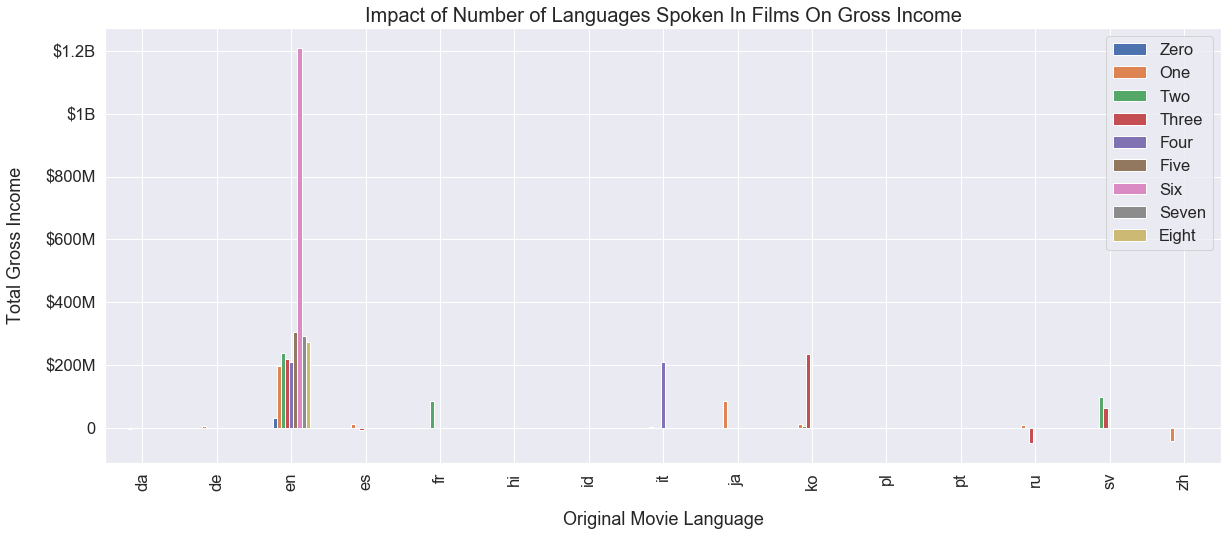

In [518]:
mdflang = major_df.groupby(['original_language','number_of_languages'])['gross_income'].mean().unstack()
mdflang = mdflang.where(pd.notnull(mdflang), None)
mdflang.columns = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight']

fig, ax = plt.subplots(figsize=(20,8))
mdflang.plot(kind='bar',ax=ax)


sns.set(font_scale=1.5)

plt.xlabel('Original Movie Language',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Impact of Number of Languages Spoken In Films On Gross Income', y=1.0, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(True)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))


plt.show()

## Takeaway #3: English Films With Many Languages Spoken In Film = $$$

What's clear from the data here is that -- over time -- the films which have English as their original language and <b>also</b> have other languages being spoken in the film are by and large the top earners.

We can even see that as the number of languages spoken in the originally-English-speaking films goes up, the net income goes up as well!

## 🧗🏿 🌍 👨🏿‍🚀 Fourth Question:

### How do films that belong to collections fare compared to films not apart of collections?

Now, what I'll do next is investigate films that are part of collections. I've noticed a decent amount of collections in the dataset and I'm curious how these films fare compared to the others.

In [519]:
#First, to look at the dataset again to refresh!
newshaq

adult                     backdrop_path  \
0    False  /qVygtf2vU15L2yKS4Ke44U4oMdD.jpg   
1    False  /owraiceOKtSOa3t8sp3wA9K2Ox6.jpg   
2    False  /s7NC2kntiPB3WltWj9bnNTkoqUp.jpg   
3    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qAvou7F5P4VcIR72JzzrnKEQSN3.jpg   
996  False  /uo2uaD6vNi62gyf13UMQ3cp7z4O.jpg   
997  False  /pLvH5txR35Yi0IK9fOwjR0cD9Kj.jpg   
998  False  /mXowJ0usjsCgI9hM0BSIoTVnKRI.jpg   
999  False  /Aq5Zhj9iaTF6BEKNk05dlUxeHKa.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None         0   
3                                                 None         0   
4                                                 None  55000000   
..                                                 ...       ...   
995  {'id': 627517, 'name': 'Oz Collection', 'poste...   2777000   
996  {'id': 496796, 'name': 'Sicario Collection', '...  30000000   
997                                               None  15000000   
998                                               None  48000000   
999                                               None  45000000   

                                                genres  \
0    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
1    [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
2    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
996  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
997  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
998  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
999  [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...   

                                     homepage      id     imdb_id  \
0         http://www.netflix.com/projectpower  605116   tt7550000   
1                                              703771  tt12876132   
2      https://www.netflix.com/title/81252403  726664   tt8675288   
3      https://www.netflix.com/title/81132038  612706  tt10276470   
4                  http://www.jokermovie.net/  475557   tt7286456   
..                                        ...     ...         ...   
995      http://thewizardofoz.warnerbros.com/     630   tt0032138   
996  https://www.lionsgate.com/movies/sicario  273481   tt3397884   
997                                              1018   tt0166924   
998        https://www.instantfamilymovie.com  491418   tt7401588   
999    https://www.netflix.com/title/81045635  581859   tt9777644   

    original_language                              original_title  \
0                  en                               Project Power   
1                  en  Deathstroke: Knights & Dragons - The Movie   
2                  en                                    Fearless   
3                  en                                     Work It   
4                  en                                       Joker   
..                ...                                         ...   
995                en                            The Wizard of Oz   
996                en                                     Sicario   
997                en                            Mulholland Drive   
998                en                              Instant Family   
999                en                                 Da 5 Bloods   

                                              overview  popularity  \
0    An ex-soldier, a teen and a cop collide in New...     193.980   
1    Ten years ago, Slade Wilson-aka the super-assa...     157.402   
2    A teen gamer is forced to level up to ful

In [520]:
newshaq_sum = newshaq.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_sum

belongs_to_collection  gross_income  \
89   {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
64   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
176                                               None    1987463944   
168  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
9    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
..                                                 ...           ...   
454                                               None    -150000000   
366                                               None    -151000000   
230                                               None    -200000000   
51                                                None    -205000000   
446  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
89                 en           7.4       21852  
64                 en           8.3       14617  
176                en           7.9       17518  
168                en           7.4       14812  
9                  en           8.3       19334  
..                ...           ...         ...  
454                en           6.3        2435  
366                en           7.7        3853  
230                en           0.0           0  
51                 en           0.0           0  
446                en           0.0           0  

[1000 rows x 5 columns]

In [521]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less = newshaq_less.loc[:,['belongs_to_collection','gross_income','original_language','vote_average','vote_count']].sort_values(by='gross_income', ascending=False)
newshaq_less

belongs_to_collection  gross_income  \
89   {'id': 87096, 'name': 'Avatar Collection', 'po...    2550965087   
64   {'id': 86311, 'name': 'The Avengers Collection...    2441800564   
168  {'id': 10, 'name': 'Star Wars Collection', 'po...    1823223624   
9    {'id': 86311, 'name': 'The Avengers Collection...    1746239637   
172  {'id': 328, 'name': 'Jurassic Park Collection'...    1521713208   
..                                                 ...           ...   
269  {'id': 619537, 'name': 'Train to Busan Collect...     -17000000   
302  {'id': 731067, 'name': 'Bird Box Collection', ...     -19800000   
50   {'id': 135179, 'name': 'Sin City Collection', ...     -25592384   
257  {'id': 428046, 'name': 'Viy Collection', 'post...     -49000000   
446  {'id': 645, 'name': 'James Bond Collection', '...    -242000000   

    original_language  vote_average  vote_count  
89                 en           7.4       21852  
64                 en           8.3       14617  
168                en           7.4       14812  
9                  en           8.3       19334  
172                en           6.6       15898  
..                ...           ...         ...  
269                ko           6.1          40  
302                en           6.9        6784  
50                 en           6.3        2694  
257                ru           6.2         147  
446                en           0.0           0  

[390 rows x 5 columns]

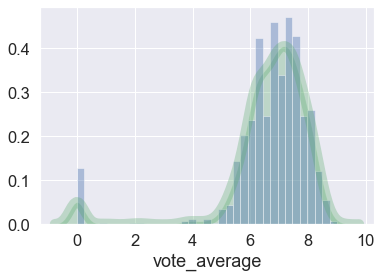

In [359]:
sns.distplot(a = newshaq_sum["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

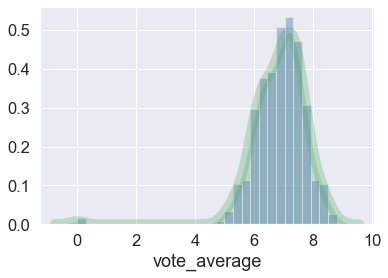

In [351]:
sns.distplot(a = newshaq_less["vote_average"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

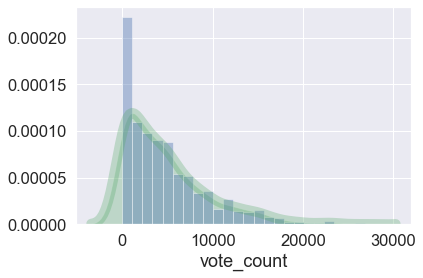

In [395]:
sns.distplot(a = newshaq_sum["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

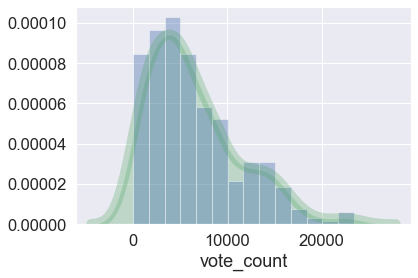

In [396]:
sns.distplot(a = newshaq_less["vote_count"], kde=True,
kde_kws={"color": "g", "alpha":0.3, "linewidth": 10, "shade":True })

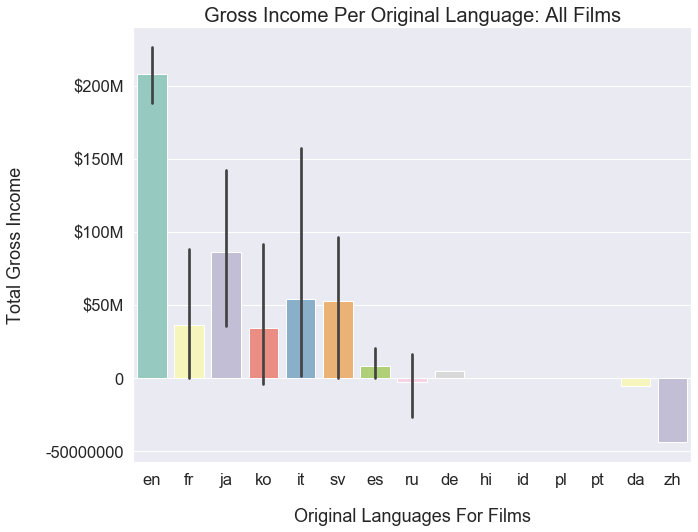

In [522]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_sum, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: All Films', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

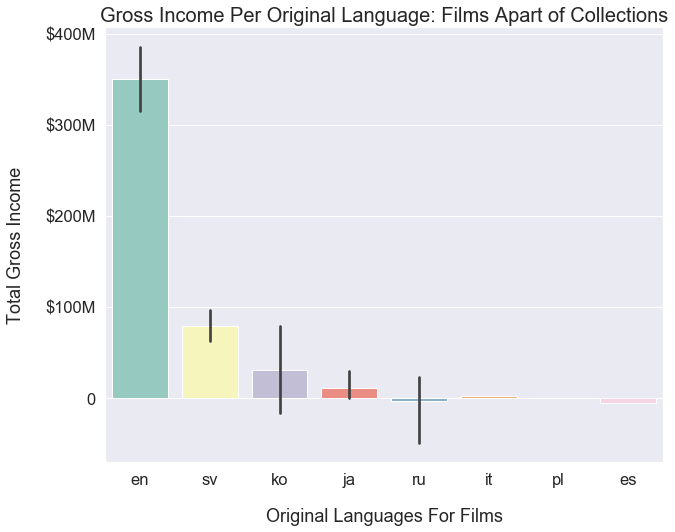

In [523]:
fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(x="original_language", y="gross_income", data=newshaq_less, palette="Set3",ax=ax)

sns.set(font_scale=1.5)

plt.xlabel('Original Languages For Films',labelpad=20)
plt.ylabel('Total Gross Income',labelpad=20)
plt.title('Gross Income Per Original Language: Films Apart of Collections', y=1.0, fontsize=20)

ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

In [524]:
newshaq_sum_2 = newshaq.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_sum_2

gross_income    195319195510
dtype: int64

In [525]:
newshaq_less = newshaq.dropna(subset = ['belongs_to_collection','poster_path'])
newshaq_less_2 = newshaq_less.loc[:,['belongs_to_collection','gross_income']].sort_values(by='gross_income', ascending=False).sum()
newshaq_less_2

gross_income    132368550403
dtype: int64

In [526]:
collections_diff = sum(newshaq_sum_2) - sum(newshaq_less_2)
print(f'Total gross income without films apart of a collection included is: ${float(collections_diff)}')
print('That is north of $62 billion USD')

Total gross income without films apart of a collection included is: $62950645107.0
That is north of $62 billion USD


In [527]:
collections_makeup = newshaq_less_2 / newshaq_sum_2
print(f'Films apart of collections makeup {float(collections_makeup)} of the total gross income!')
print('That is more than 2/3!')

Films apart of collections makeup 0.6777037456936635 of the total gross income!
That is more than 2/3!


## Takeaway #4: Collections Make Sense...As Long As They Are English-Speaking?

It's pretty interesting to see that films apart of collections account for such a large portion of the income. But, this isn't surprising, either. All in all, the voting averages are similar, with a bit of a nod towards films apart of collections.

---

## 🧗🏿 🌍 👨🏿‍🚀 Summary + Recommendations:

1. Consider producing films that are or could be apart of collections.
2. Produce films that consist of at least 4 languages being spoken in the film.
3. Invest in the production of films whose original language is Slovenian, Korean or Japanese.
4. Go with action, drama or thriller film production.
5. Take on potentially polarizing film productions (while adhering to other recommendations).

### Further Research To Consider:

1. Getting insight into what films are currently in production and comparing details with the history of production company investment and film performance.
2. How do metrics like "popularity" and "vote count" relate to the potential amount of time a customer would spend within a streaming / online movie watching platform? And, how would gaining this "consumer attention" translate to cash inflow in other areas?